In [ ]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
directory="/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/results/protein-coding/"
os.chdir(directory)

In [3]:
df = pd.read_csv("mainTable.csv", index_col=0, header=0)

In [4]:
files = pd.read_csv("files.dat", index_col=0, header=0)

In [15]:
genes = pd.read_csv("meanVariances.csv", index_col=0, header=0).reindex(index=df.index)

In [16]:
adata = sc.AnnData(df.transpose(), obs=files, var=genes)

In [17]:
adata

AnnData object with n_obs × n_vars = 11688 × 18913 
    obs: 'primary_site', 'secondary_site'
    var: 'mean', 'variance', 'type_of_gene'

In [20]:
sc.pp.log1p(adata)

In [21]:
sc.pp.highly_variable_genes(adata, n_top_genes=200)

In [59]:
HVG = adata.var[adata.var['highly_variable']==True].index
adata.var[adata.var['highly_variable']==True]

,mean,variance,type_of_gene,highly_variable,means,dispersions,dispersions_norm
ensg,,,,,,,
ENSG00000120937,2763.300000,6.490860e+08,,True,7.924551,12.366971,3.754297
ENSG00000162438,9316.300000,5.050810e+09,,True,9.139626,13.203382,3.663597
ENSG00000142615,5326.750000,2.024770e+09,,True,8.580684,12.848309,3.384452
ENSG00000158022,4766.320000,7.116870e+08,,True,8.469546,11.913892,3.381985
ENSG00000016490,1273.220000,1.412780e+08,,True,7.150090,11.617019,3.272965
...,...,...,...,...,...,...,...
ENSG00000182591,376.004000,6.601100e+07,,True,5.932255,12.075819,3.056965
ENSG00000160181,1068.390000,1.167950e+08,,True,6.974842,11.602107,3.090400
ENSG00000160182,917.690000,9.351390e+07,,True,6.822948,11.531843,3.042551


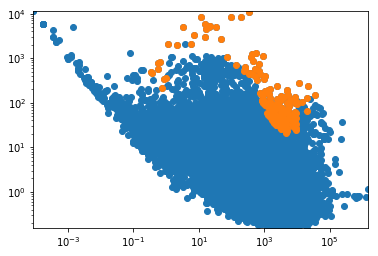

In [75]:
x = genes['mean'].values
y = genes['variance'].values
cv2 = [yi/xi/xi if xi!=0 else 0 for xi, yi in zip(x,y)]
y=np.array(cv2)
HVx = genes[genes.index.isin(HVG)]['mean'].values
HVy = genes[genes.index.isin(HVG)]['variance'].values
HVcv2 = [yi/xi/xi if xi!=0 else 0 for xi, yi in zip(HVx,HVy)]
HVy=np.array(HVcv2)
plt.scatter(x,y)
plt.scatter(HVx,HVy)
plt.ylim((y[y!=0].min(),y.max()))
plt.xlim((x[x!=0].min(),x.max()))
plt.xscale('log')
plt.yscale('log')
plt.show()

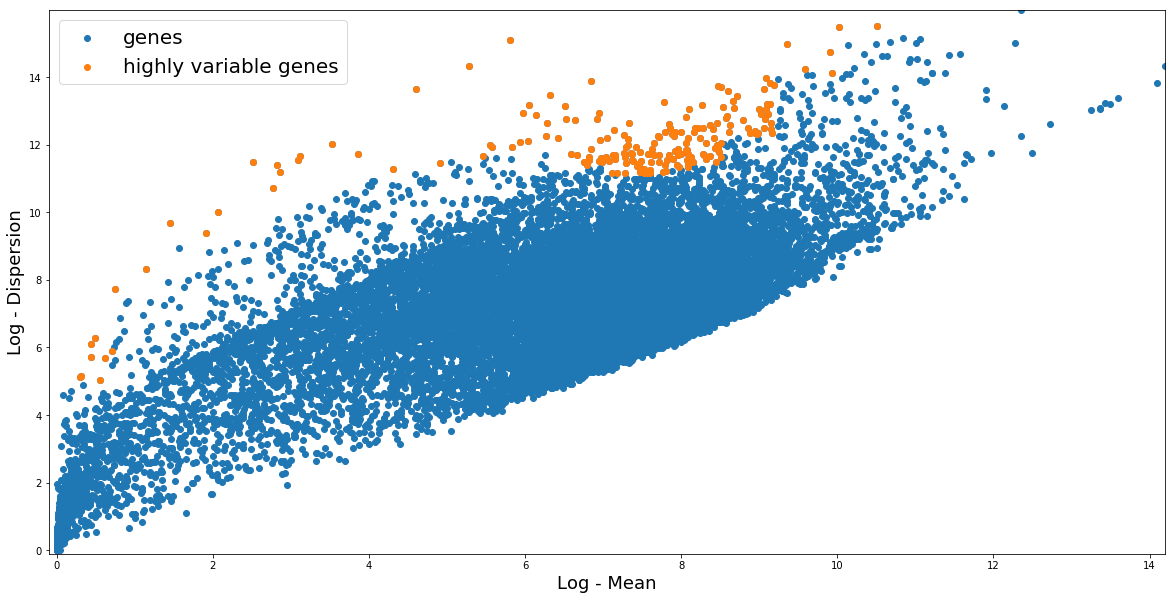

In [91]:
x = adata.var['means'].values
y = adata.var['dispersions'].values
HVx = adata.var[adata.var['highly_variable']==True]['means'].values
HVy = adata.var[adata.var['highly_variable']==True]['dispersions'].values
fig=plt.figure(figsize=(20,10))
plt.scatter(x,y, label='genes')
plt.scatter(HVx,HVy, label='highly variable genes')
plt.ylim((np.nanmin(y)-0.1,np.nanmax(y)))
plt.xlim((-0.1,x.max()))
plt.xlabel("Log - Mean", fontsize=18)
plt.ylabel("Log - Dispersion", fontsize=18)
plt.legend(fontsize=20)
plt.show()
fig.savefig("DispersionMean.pdf")

In [79]:
x.min()

1e-12

In [87]:
df.apply(lambda x: np.average(np.log(x[x!=0])), axis=1)

ensg
ENSG00000186092     0.716260
ENSG00000187634     4.867295
ENSG00000188976     8.104937
ENSG00000187961     6.470988
ENSG00000187583     4.197481
                     ...    
ENSG00000212907    11.358132
ENSG00000198886    13.781081
ENSG00000198786    12.336840
ENSG00000198695    11.168560
ENSG00000198727    13.178475
Length: 18913, dtype: float64

In [82]:
adata.var

,mean,variance,type_of_gene,highly_variable,means,dispersions,dispersions_norm
ensg,,,,,,,
ENSG00000186092,2.053300e+00,2.073060e+01,,False,1.116224,2.312249,-0.845428
ENSG00000187634,3.535860e+02,4.050930e+05,,False,5.870951,7.043837,-0.049924
ENSG00000188976,3.730890e+03,3.424220e+06,,False,8.224671,6.822073,-0.802151
ENSG00000187961,8.062740e+02,2.943860e+05,,False,6.693664,5.900340,-0.792424
ENSG00000187583,5.822370e+02,2.371420e+06,,False,6.368593,8.312206,0.733203
...,...,...,...,...,...,...,...
ENSG00000212907,1.222900e+05,1.289990e+10,,False,11.714160,11.566426,-0.390885
ENSG00000198886,1.331190e+06,1.338250e+12,,False,14.101583,13.820886,0.276471
ENSG00000198786,3.347840e+05,1.004400e+11,,False,12.721241,12.611682,-0.506451


In [88]:
HVG

Index(['ENSG00000120937', 'ENSG00000162438', 'ENSG00000142615',
       'ENSG00000158022', 'ENSG00000016490', 'ENSG00000016602',
       'ENSG00000240038', 'ENSG00000243480', 'ENSG00000203859',
       'ENSG00000159450',
       ...
       'ENSG00000124102', 'ENSG00000124233', 'ENSG00000124157',
       'ENSG00000124253', 'ENSG00000244362', 'ENSG00000182591',
       'ENSG00000160181', 'ENSG00000160182', 'ENSG00000212933',
       'ENSG00000158578'],
      dtype='object', name='ensg', length=200)